In [ ]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


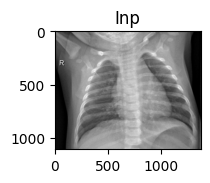

Streaming output truncated to the last 5000 lines.
473
(1001, 10000019, 1007)
173
(1001, 10000019, 1007)
594
(1001, 10000019, 1007)
768
(1001, 10000019, 1007)
74
(1001, 10000019, 1007)
241
(1001, 10000019, 1007)
910
(1001, 10000019, 1007)
387
(1001, 10000019, 1007)
414
(1001, 10000019, 1007)
341
(1001, 10000019, 1007)
453
(1001, 10000019, 1007)
98
(1001, 10000019, 1007)
230
(1001, 10000019, 1007)
450
(1001, 10000019, 1007)
273
(1001, 10000019, 1007)
750
(1001, 10000019, 1007)
441
(1001, 10000019, 1007)
872
(1001, 10000019, 1007)
167
(1001, 10000019, 1007)
284
(1001, 10000019, 1007)
898
(1001, 10000019, 1007)
246
(1001, 10000019, 1007)
372
(1001, 10000019, 1007)
529
(1001, 10000019, 1007)
909
(1001, 10000019, 1007)
690
(1001, 10000019, 1007)
264
(1001, 10000019, 1007)
811
(1001, 10000019, 1007)
455
(1001, 10000019, 1007)
732
(1001, 10000019, 1007)
150
(1001, 10000019, 1007)
534
(1001, 10000019, 1007)
384
(1001, 10000019, 1007)
598
(1001, 10000019, 1007)
848
(1001, 10000019, 1007)
53
(10

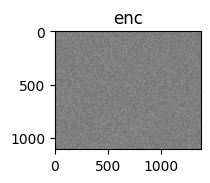

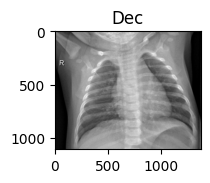

In [ ]:
import random
from sympy import nextprime, mod_inverse
import cv2
import matplotlib.pyplot as plt
def key_generation():
    p=10000019
    q=1007
    s = generate_prime()
    t = generate_prime()
    a = 1001
    return (a, p, q)

def generate_prime():
    # Use sympy's nextprime function to generate a prime number
    return nextprime(random.randint(10**6, 10**7))


def compute_result(a, c, a_inverse, p, q):
    a = np.int64(a)
    c = np.int64(c)
    a_inverse = np.int64(a_inverse)
    p = np.int64(p)
    q = np.int64(q)

    return np.mod(np.mod(c * a_inverse, p), q)

def encrypt(key, w, g, i):
    a, p, q = key  # Unpack the key tuple correctly
    return (pow(a, g) * (w * q + i)) % p

def decrypt(key, c, g):
    a, p, q = key  # Unpack the key tuple correctly
    a_inverse = pow(a, -g, p)
    x = compute_result(a, c, a_inverse, p, q)
    #return ((c * a_inverse) % p) % q
    return x

def encrypt_image(key, image):
    a, p, q = key  # Unpack the key tuple correctly
    encrypted_image = []
    for row in image:
        encrypted_row = []
        for element in row:
            if p < q:  # Swap p and q if p is less than q
                p, q = q, p
            w = random.randint(1,q)
            print(w)
            print(key)
            g = 1
            encrypted_element = encrypt(key, w, g, element)
            encrypted_row.append(encrypted_element)
        encrypted_image.append(encrypted_row)
    return encrypted_image

def decrypt_image(key, encrypted_image):
    a, p, _ = key  # Unpack the key tuple correctly
    decrypted_image = []
    for row in encrypted_image:
        decrypted_row = []
        for element in row:
            g = 1
            decrypted_element = decrypt(key, element, g)
            decrypted_row.append(decrypted_element)
        decrypted_image.append(decrypted_row)
    return decrypted_image

# Set a fixed seed for reproducibility
random.seed(123)

# Example usage:
# Assume we have an input image represented as a matrix 'image'
#image = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# Specify the path to your image in Google Drive
image_path = '/content/drive/MyDrive/ch/train/NORMAL/NORMAL_3153.jpeg'

# Read the image
image = cv2.imread(image_path, 0)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Inp')
plt.show()

# Key Generation
key = key_generation()
a, p, q = key


# Encryption
plt.subplot(1, 3, 2)
encrypted_image = encrypt_image(key, image)
plt.imshow(encrypted_image, cmap=plt.cm.gray)
plt.title('enc')
plt.show()



# Decryption
plt.subplot(1, 3, 3)
decrypted_image = decrypt_image(key, encrypted_image)
plt.imshow(decrypted_image, cmap=plt.cm.gray)
plt.title('Dec')
plt.show()


# plt.subplot(2, 3, 1)
# plt.title("Input Image Histogram")
# plt.hist(image.ravel(),256,[0,255])
# plt.show()


# encrypted_image = np.array(encrypted_image)

# plt.subplot(2, 3, 2)
# plt.title("Encrypted Image Histogram")
# plt.hist(encrypted_image.ravel(),256,[0,255])
# plt.show()



# # Convert the list to a NumPy array
# decrypted_image = np.array(decrypted_image)

# plt.subplot(2, 3, 3)
# plt.title("Decrypted Image Histogram")
# plt.hist(decrypted_image.ravel(),256,[0,255])
# plt.show()



# print("Original Image:")
# print(image)
# print("Encrypted Image:")
# print(encrypted_image)
# print("Decrypted Image:")
# print(decrypted_image)


In [ ]:
'''
# Install required packages
!pip install --upgrade tensorflow-federated
!pip install tensorflow==2.15.0
'''

'\n# Install required packages\n!pip install --upgrade tensorflow-federated\n!pip install tensorflow==2.15.0\n'

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Load training data using flow_from_directory
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/ch/train/',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)


Found 2100 images belonging to 2 classes.


In [ ]:
def distribute_data_among_clients(images, labels, num_clients):
    data_per_client = len(images) // num_clients
    client_data = []

    for i in range(num_clients):
        start = i * data_per_client
        end = start + data_per_client if i < num_clients - 1 else len(images)

        # Print the number of images for clients
        num_images = end - start
        '''print(f"Client {i + 1} - Number of Images: {num_images}")'''
        client_data.append((images[start:end], labels[start:end]))

    return client_data

In [ ]:
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/ch/val/',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

Found 314 images belonging to 2 classes.


In [ ]:
batch_size = 32

# Training and testing  Dataset batch mkking
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, train_generator.num_classes), dtype=tf.float32)
    )
)


test_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, validation_generator.num_classes), dtype=tf.float32)
    )
)


In [ ]:
# Load the global model
global_model_path = '/content/drive/MyDrive/chest_xray_inceptionv3.keras'
global_model = tf.keras.models.load_model(global_model_path)

# preprocess the dataset according to InceptionV3
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
def preprocess_dataset_inceptionv3(data_dir, image_size=(299, 299), class_names=['NORMAL', 'PNEUMONIA']):
    X = []
    y = []
    for label, class_name in enumerate(class_names):
        folder_path = os.path.join(data_dir, class_name)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img)
            img_array = preprocess_input(img_array)
            X.append(img_array)
            y.append(label)
    return np.array(X), np.array(y)

# clone prev trained global model in local model
def train_local_model_inceptionv3(global_model, client_dataset):
    X_client, y_client = client_dataset
    local_model = tf.keras.models.clone_model(global_model)
    local_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    local_model.set_weights(global_model.get_weights())
    history = local_model.fit(X_client, y_client, epochs=1, batch_size=32, validation_split=0.2, verbose=1)
    return local_model, history.history['val_accuracy'][-1]

In [ ]:
import matplotlib.pyplot as plt

def plot_comparison(global_val_accuracies, local_val_accuracies):
    plt.figure(figsize=(10, 6))
    plt.plot(global_val_accuracies, label='Global Model', linestyle='-')
    for i, local_accuracies in enumerate(local_val_accuracies):
        plt.plot(local_accuracies, label=f'Local Model {i+1}', linestyle='--')
    plt.xlabel('Round')
    plt.ylabel('Validation Accuracy')
    plt.title('Comparison of Global and Local Model Performance')
    plt.legend()
    plt.show()

In [ ]:
def aggregate_weights(local_model_weights):
    # average aggregation
    num_models = len(local_model_weights)
    global_weights = [np.zeros_like(w) for w in local_model_weights[0]]

    for layer in range(len(global_weights)):
        for model_weights in local_model_weights:
            global_weights[layer] += model_weights[layer]

        global_weights[layer] /= num_models

    return global_weights

Round 1
Previous Global Model - Training Accuracy: 0.9442, Validation Accuracy: 0.9365
Client 1 - Local Model Validation Accuracy: 1.0000
Client 2 - Local Model Validation Accuracy: 1.0000
Client 3 - Local Model Validation Accuracy: 0.5882
Global Model - Training Accuracy: 0.8127, Validation Accuracy: 0.7937



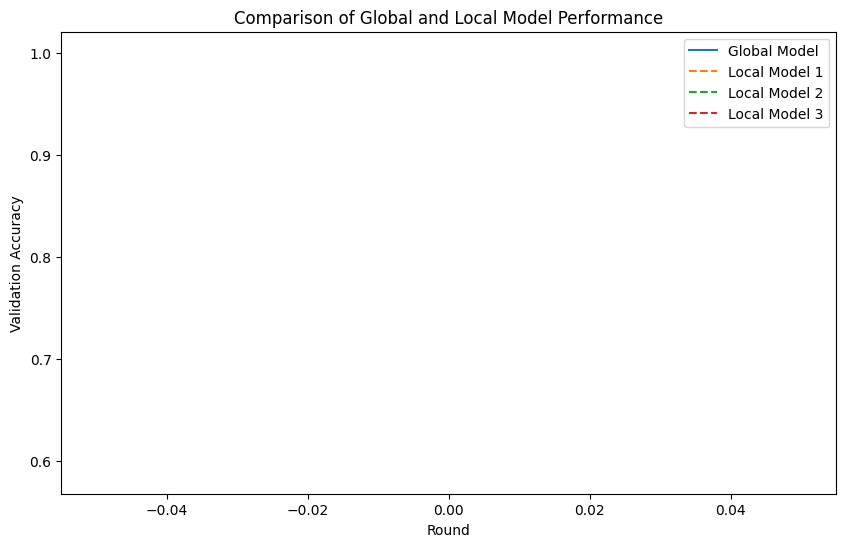

Round 2
Previous Global Model - Training Accuracy: 0.8127, Validation Accuracy: 0.7937
Client 1 - Local Model Validation Accuracy: 0.8824


Client 2 - Local Model Validation Accuracy: 1.0000


Client 3 - Local Model Validation Accuracy: 0.8824
Global Model - Training Accuracy: 0.9562, Validation Accuracy: 0.9524



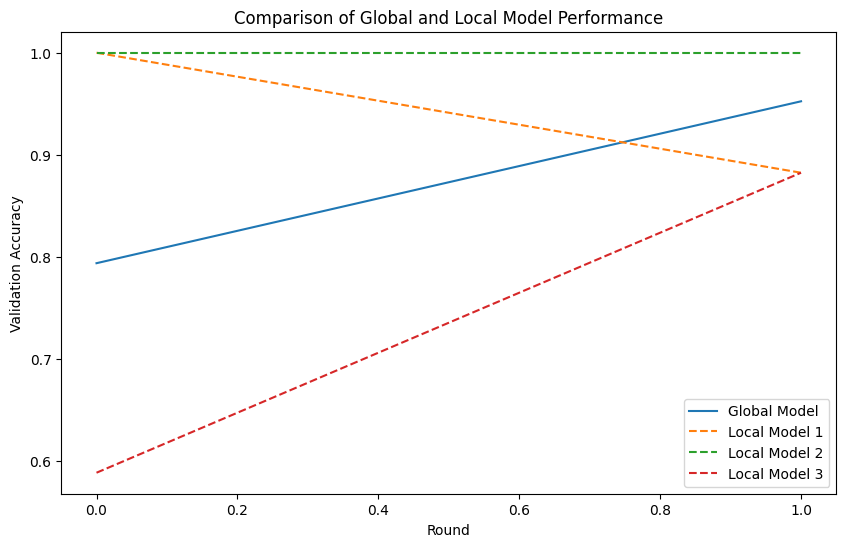

Round 3
Previous Global Model - Training Accuracy: 0.9562, Validation Accuracy: 0.9524
Client 1 - Local Model Validation Accuracy: 0.9412
Client 2 - Local Model Validation Accuracy: 0.9412
Client 3 - Local Model Validation Accuracy: 0.5882
Global Model - Training Accuracy: 0.9203, Validation Accuracy: 0.9206



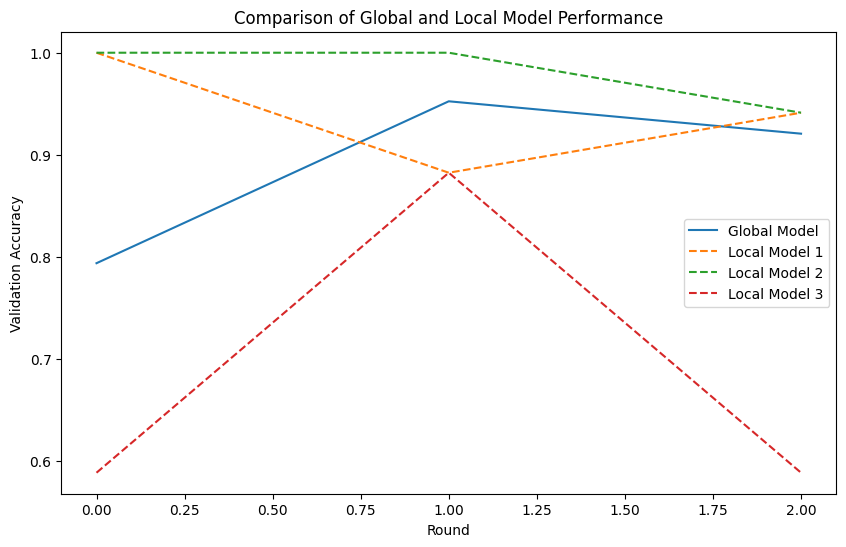

Round 4
Previous Global Model - Training Accuracy: 0.9203, Validation Accuracy: 0.9206
Client 1 - Local Model Validation Accuracy: 1.0000
Client 2 - Local Model Validation Accuracy: 0.8824
Client 3 - Local Model Validation Accuracy: 0.9412
Global Model - Training Accuracy: 0.9363, Validation Accuracy: 0.9206



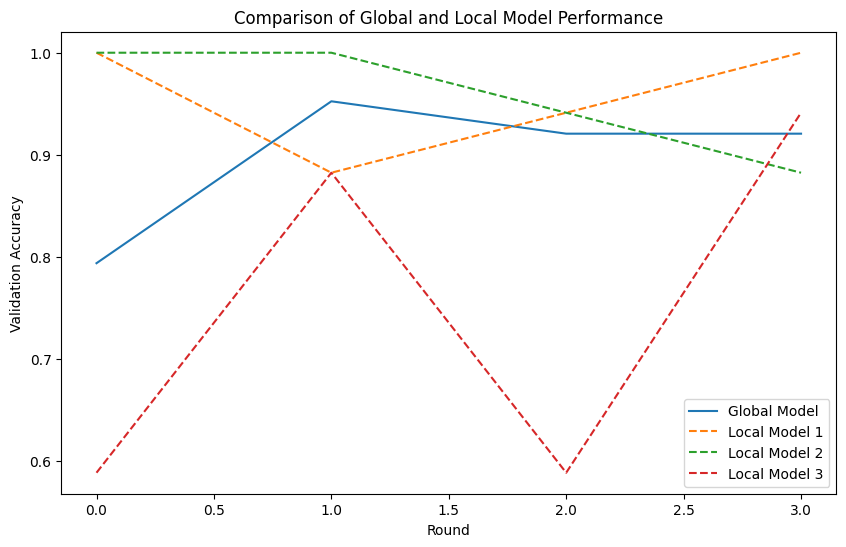

Round 5
Previous Global Model - Training Accuracy: 0.9363, Validation Accuracy: 0.9206
Client 1 - Local Model Validation Accuracy: 1.0000
Client 2 - Local Model Validation Accuracy: 1.0000
Client 3 - Local Model Validation Accuracy: 0.9412
Global Model - Training Accuracy: 0.9482, Validation Accuracy: 0.9206



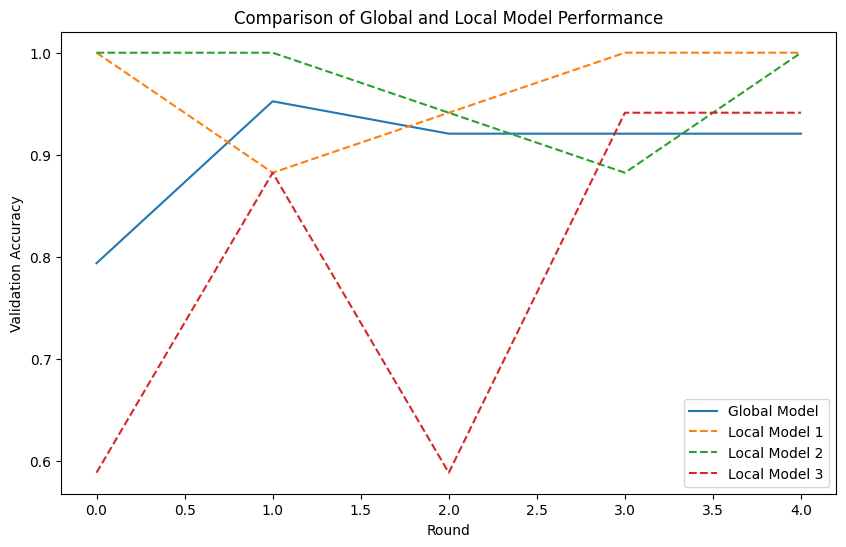

In [ ]:
# Function for FL simulation with InceptionV3
def federated_learning_simulation_inceptionv3(data_dir, num_clients=3, num_rounds=5):
    X, y = preprocess_dataset_inceptionv3(data_dir)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

    global_val_accuracies = []
    local_val_accuracies = [[] for _ in range(num_clients)]

    for round_num in range(num_rounds):
        print(f"Round {round_num + 1}")

        # Distribute data among clients
        client_data = distribute_data_among_clients(X_train, y_train, num_clients)

        # Print previous global model accuracy
        prev_global_train_accuracy = global_model.evaluate(X_train, y_train, verbose=0)[1]
        prev_global_val_accuracy = global_model.evaluate(X_val, y_val, verbose=0)[1]
        print(f"Previous Global Model - Training Accuracy: {prev_global_train_accuracy:.4f}, Validation Accuracy: {prev_global_val_accuracy:.4f}")

        local_models = []
        for client_id in range(num_clients):
            X_client, y_client = client_data[client_id]

            # Clone the global model
            local_model = tf.keras.models.clone_model(global_model)
            local_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            local_model.set_weights(global_model.get_weights())

            # Training locally cloned model
            history = local_model.fit(X_client, y_client, epochs=1, batch_size=32, validation_split=0.2, verbose=0)
            local_models.append(local_model)
            local_val_accuracy = history.history['val_accuracy'][-1]
            local_val_accuracies[client_id].append(local_val_accuracy)
            print(f"Client {client_id + 1} - Local Model Validation Accuracy: {local_val_accuracy:.4f}")

        # Aggregate local models to update global model
        local_model_weights = [model.get_weights() for model in local_models]
        new_global_weights = aggregate_weights(local_model_weights)
        global_model.set_weights(new_global_weights)

        # Evaluate global model
        global_val_accuracy = global_model.evaluate(X_val, y_val, verbose=0)[1]
        global_val_accuracies.append(global_val_accuracy)

        # Print current global model accuracy
        global_train_accuracy = global_model.evaluate(X_train, y_train, verbose=0)[1]
        print(f"Global Model - Training Accuracy: {global_train_accuracy:.4f}, Validation Accuracy: {global_val_accuracy:.4f}")
        print()


        plot_comparison(global_val_accuracies, local_val_accuracies)

    return global_val_accuracies, local_val_accuracies

# Run federated learning simulation
validation_dir = '/content/drive/MyDrive/ch/val/'
global_val_accuracies, local_val_accuracies = federated_learning_simulation_inceptionv3(validation_dir)


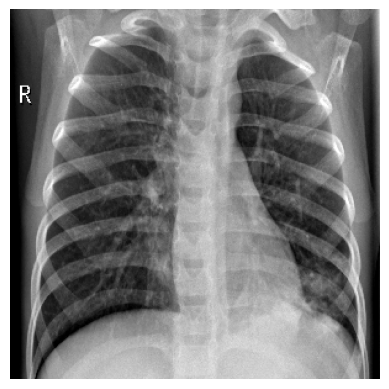

1/1 [==============================] - 2s 2s/step
Raw Predictions: [[0.03617819]]
Class Index: 0
The model predicts the image as: NORMAL


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Replace 'your_image_path' with the actual path of the image you want to classify
image_path = '/content/drive/MyDrive/For_test_input/affected/person87_virus_160.jpeg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(300, 300))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


plt.imshow(img)
plt.axis('off')
plt.show()

# predictions from the global model
predictions = global_model.predict(img_array)

# threshold for binary classification (e.g., 0.5)
threshold = 0.5

# prediction
predicted_class = "PNEUMONIA" if predictions[0, 0] > threshold else "NORMAL"

# raw predictions, class index, and final predicted class
print("Raw Predictions:", predictions)
print("Class Index:", 0)  # Since it's a binary classification
print(f"The model predicts the image as: {predicted_class}")


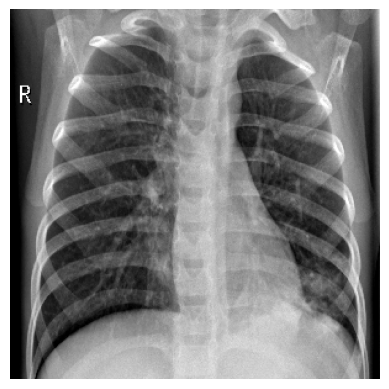

1/1 [==============================] - 0s 432ms/step
Raw Predictions: [[0.03617819]]
Class Index: 0
The model predicts the image as: NORMAL


In [ ]:
# Replace 'your_image_path' with the actual path of the image you want to classify
image_path = '/content/drive/MyDrive/For_test_input/affected/person87_virus_160.jpeg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(300, 300))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


plt.imshow(img)
plt.axis('off')
plt.show()

# predictions from the global model
predictions = global_model.predict(img_array)

# threshold for binary classification (e.g., 0.5)
threshold = 0.5

# prediction
predicted_class = "PNEUMONIA" if predictions[0, 0] > threshold else "NORMAL"

# raw predictions, class index, and final predicted class
print("Raw Predictions:", predictions)
print("Class Index:", 0)  # Since it's a binary classification
print(f"The model predicts the image as: {predicted_class}")

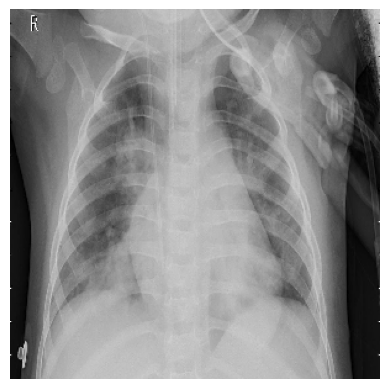

1/1 [==============================] - 0s 249ms/step
Raw Predictions: [[0.99233514]]
Class Index: 0
The model predicts the image as: PNEUMONIA


In [ ]:
# Replace 'your_image_path' with the actual path of the image you want to classify
image_path = '/content/drive/MyDrive/For_test_input/affected/person9_bacteria_38.jpeg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(300, 300))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


plt.imshow(img)
plt.axis('off')
plt.show()

# predictions from the global model
predictions = global_model.predict(img_array)

# threshold for binary classification (e.g., 0.5)
threshold = 0.5

# prediction
predicted_class = "PNEUMONIA" if predictions[0, 0] > threshold else "NORMAL"

# raw predictions, class index, and final predicted class
print("Raw Predictions:", predictions)
print("Class Index:", 0)  # Since it's a binary classification
print(f"The model predicts the image as: {predicted_class}")

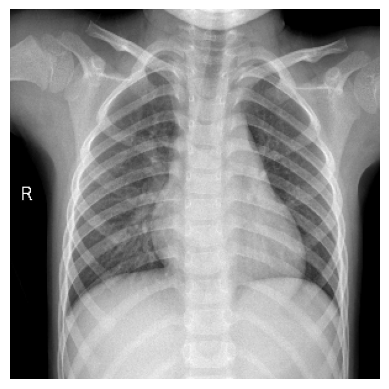

1/1 [==============================] - 0s 248ms/step
Raw Predictions: [[0.02136582]]
Class Index: 0
The model predicts the image as: NORMAL


In [ ]:
# Replace 'your_image_path' with the actual path of the image you want to classify
image_path = '/content/drive/MyDrive/For_test_input/Normal/NORMAL2-IM-0287-0001.jpeg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(300, 300))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


plt.imshow(img)
plt.axis('off')
plt.show()

# predictions from the global model
predictions = global_model.predict(img_array)

# threshold for binary classification (e.g., 0.5)
threshold = 0.5

# prediction
predicted_class = "PNEUMONIA" if predictions[0, 0] > threshold else "NORMAL"

# raw predictions, class index, and final predicted class
print("Raw Predictions:", predictions)
print("Class Index:", 0)  # Since it's a binary classification
print(f"The model predicts the image as: {predicted_class}")